<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Overview</a></span></li></ul></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Model-the-Data-with-PCA" data-toc-modified-id="Model-the-Data-with-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model the Data with PCA</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

import sys
sys.path.append('../../')
import chemometrics

import numpy as np
import pandas as pd

import watermark
%load_ext watermark

Overview
--------

This is an example of how to use PCA to inspect data for outliers or extreme points.

In [2]:
%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 4.15.0-166-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

numpy     : 1.19.4
watermark : 2.1.0
matplotlib: 3.3.1
pandas    : 1.1.4
json      : 2.0.9
sklearn   : 0.24.0
sys       : 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]



# Load the Data

In [3]:
# Let's load some data from the tests/ for this example
df = pd.read_csv('../tests/data/pls_train.csv')

In [4]:
df

,Group,Name,Water,9000,9016,9032,9048,9064,9080,9096,...,10728,10744,10760,10776,10792,10808,10824,10840,10856,10872
0,1,psh1079,13.1,1.200471,1.200235,1.197285,1.191587,1.182786,1.170456,1.154333,...,0.947764,0.911444,0.874897,0.838401,0.802317,0.767152,0.733518,0.702013,0.673171,0.647416
1,1,psh1080,13.1,1.118446,1.120228,1.119543,1.116151,1.109550,1.099261,1.085294,...,1.019738,0.986162,0.952236,0.918314,0.884795,0.852187,0.821023,0.791809,0.765117,0.741465
2,1,psh1082,12.5,1.151631,1.153625,1.153154,1.149782,1.142985,1.132223,1.117273,...,0.960466,0.920775,0.880692,0.840490,0.800624,0.761642,0.724088,0.688496,0.655518,0.625669
3,1,psh1104,11.3,1.249430,1.246106,1.240054,1.231071,1.218746,1.202648,1.182540,...,0.857823,0.811211,0.764474,0.717992,0.672193,0.627514,0.584488,0.543758,0.505945,0.471541
4,1,psh1108,11.8,1.249200,1.249285,1.246747,1.241193,1.232022,1.218881,1.201564,...,0.851214,0.805609,0.759625,0.713541,0.667789,0.622848,0.579296,0.537772,0.498901,0.463128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,psh1572,12.1,1.208627,1.206364,1.201533,1.193940,1.183109,1.168546,1.150101,...,0.920882,0.880061,0.839070,0.798221,0.757988,0.718879,0.681480,0.646393,0.614156,0.585222
100,1,psh1581,11.1,1.309433,1.306744,1.301490,1.293203,1.281229,1.265039,1.244515,...,0.786403,0.736794,0.687120,0.637611,0.588602,0.540568,0.494092,0.449807,0.408333,0.370142
101,1,psh1583,11.9,1.242202,1.241043,1.237199,1.230210,1.219605,1.205144,1.186659,...,0.885069,0.841860,0.798274,0.754636,0.711474,0.669237,0.628333,0.589353,0.552943,0.519681
102,1,psh1593,12.1,1.260220,1.259043,1.255041,1.247895,1.237305,1.222779,1.204197,...,0.858332,0.812683,0.766794,0.721072,0.675887,0.631626,0.588853,0.548129,0.510001,0.475069


In [5]:
raw_x = np.array(df.values[:,3:], dtype=float) # Extract features

# Model the Data with PCA

In [6]:
from chemometrics.classifier.pca import PCA

In [7]:
model = PCA(n_components=2, alpha=0.05, gamma=0.01, scale_x=True)

In [8]:
_ = model.fit(raw_x)

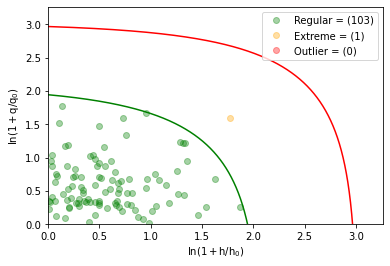

In [9]:
_ = model.visualize(raw_x)

In [ ]:
extremes_mask, outliers_mask = model.check_outliers(raw_x)

In [ ]:
regular_mask = model.predict(raw_x)

In [ ]:
np.any(extremes_mask)

In [ ]:
np.any(outliers_mask)

In [ ]:
t = model.transform(raw_x)
plt.plot(t[~extremes_mask,0], t[~extremes_mask,1], 
         marker='o',
        lw=0,
         color='g'
        )
plt.plot(t[extremes_mask,0], t[extremes_mask,1], 
         marker='o',
        lw=0,
         color='r'
        )
_ = plt.axis('equal')